In [1]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
#To download the dataset for torchvision
import torchvision
from torchvision import datasets, transforms
#For plots
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PATH = 'MNIST_LR'

In [3]:
trn_set = datasets.MNIST(PATH, train=True, download=True)

Processing...
Done!


In [4]:
tst_set = datasets.MNIST(PATH, train=False, download=True)

In [5]:
len(trn_set),len(tst_set)

(60000, 10000)

In [6]:
trn_set.train_data[0]



Columns 0 to 12 
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     3
    0     0     0     0     0     0     0     0    30    36    94   154   170
    0     0     0     0     0     0     0    49   238   253   253   253   253
    0     0     0     0     0     0     0    18   219   253   253   253   253
    0     0     0     0     0     0     0     0    80   156   107   253   253
    0     0     0     0     0     0     0     0     0    14     1   154   253
    0     0     0     0     0     0     0     0     0     0     0   139   253
    0     0     0     0     0     0     0    

In [7]:
trn_set.train_data[0].numpy()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

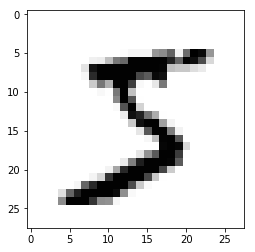

In [8]:
plt.imshow(trn_set.train_data[0].numpy(), cmap='Greys')

In [9]:
trn_set.train_labels[0]

5

In [10]:
tsfms = transforms.ToTensor()
trn_set = datasets.MNIST(PATH, train=True, download=True, transform=tsfms)
tst_set = datasets.MNIST(PATH, train=False, download=True, transform=tsfms)

In [11]:
trn_loader = torch.utils.data.DataLoader(trn_set, batch_size=64, shuffle=True, num_workers=0)
tst_loader = torch.utils.data.DataLoader(tst_set, batch_size=64, shuffle=False, num_workers=0)

In [12]:
mb_example = next(iter(trn_loader))

In [21]:
mb_example[0][1][0]



Columns 0 to 9 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.000

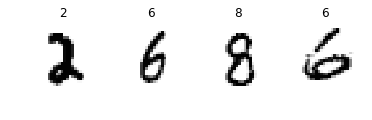

In [19]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy(), cmap='Greys')
    sub_plot.set_title(mb_example[1][i])

In [22]:
mean = torch.mean(trn_set.train_data.type(torch.FloatTensor))/255.
std = torch.std(trn_set.train_data.type(torch.FloatTensor))/255.
mean,std

(0.1306604762738429, 0.30810780717887876)

In [23]:
tsfms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])
trn_set = datasets.MNIST(PATH, train=True, download=True, transform=tsfms)
tst_set = datasets.MNIST(PATH, train=False, download=True, transform=tsfms)

In [24]:
trn_loader = torch.utils.data.DataLoader(trn_set, batch_size=64, shuffle=True, num_workers=0)
tst_loader = torch.utils.data.DataLoader(tst_set, batch_size=64, shuffle=False, num_workers=0)

In [25]:
mb_example = next(iter(trn_loader))

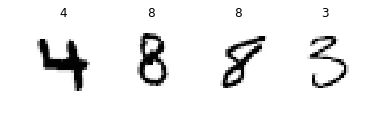

In [26]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy() * std + mean, cmap='Greys', interpolation=None)
    sub_plot.set_title(mb_example[1][i])

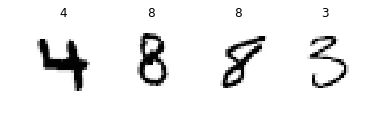

In [27]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy(), cmap='Greys', interpolation=None)
    sub_plot.set_title(mb_example[1][i])

It's always a good idea to create a model as a subclass of nn.Module. That way, we can use all the features this class provides.

We override the init function (but still call the init function of nn.Module) to define our custom layers (here two linear layers) and we have to define the forward function, which explains how to compute the output.

The first line of the forward function is to flatten our input, since we saw it has four dimensions: minibatch by channel by height by width. We only keep the minibatch size as our first dimension (x.size(0)) and the -1 is to tell pytorch to determine the right number for the second dimension.

In [28]:
class SimpleNeuralNet(nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super().__init__()
        self.linear1 = nn.Linear(n_in, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_out)
    
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = F.relu(self.linear1(x))
        return F.log_softmax(self.linear2(x), dim=-1)

Then we can instanciate the class with our input size (28 * 28), an hidden size of 100 layers and 10 outputs (as many as digits).

The optimizer will automatically do the Stochastic Gradient Descent for us (or any of its variant if we want).

In [29]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-2)

Now we're ready to write our training loop. To compute the gradient automatically, pytorch requires us to put the torch tensors with our inputs and labels into Variable objects, that way it'll remember the transformation these go through until we arrive at our loss function. We then call loss.backward() to compute all the gradients (which will then be in the grad field of any variable).

The optimizer takes care of the step of our gradient descent in the optimizer.step() function. Since the gradients are accumulated, we have to tell pytorch when to reinitialize them (which the purpose of the optimizer.zero_grad() command at the beginning).

# Sample training step to check all inputs of training with Pytorch

In [31]:
inputs,labels = list(trn_loader)[0]

In [34]:
inputs, labels = Variable(inputs), Variable(labels)

In [35]:
optimizer.zero_grad()

In [36]:
outputs = net(inputs)

In [38]:
_,preds = torch.max(outputs.data,1)


In [41]:
loss = F.nll_loss(outputs, labels)

In [48]:
loss.data[0],inputs.size(0)

(2.3503997325897217, 64)

## Actual training step

In [49]:
def train(nb_epoch):
    for epoch in range(nb_epoch):
        running_loss = 0.
        corrects = 0
        print(f'Epoch {epoch+1}:')
        for data in trn_loader:
            #separate the inputs from the labels
            inputs,labels = data
            #wrap those into variables to keep track of how they are created and be able to compute their gradient.
            inputs, labels = Variable(inputs), Variable(labels)
            #Put the gradients back to zero
            optimizer.zero_grad()
            #Compute the outputs given by our model at this stage.
            outputs = net(inputs)
            _,preds = torch.max(outputs.data,1)
            #Compute the loss
            loss = F.nll_loss(outputs, labels)
            running_loss += loss.data[0] * inputs.size(0)
            corrects += torch.sum(labels.data == preds)
            #Backpropagate the computation of the gradients
            loss.backward()
            #Do the step of the SGD
            optimizer.step()
        print(f'Loss: {running_loss/len(trn_set)}  Accuracy: {100.*corrects/len(trn_set)}')

In [50]:
train(10)

Epoch 1:
Loss: 0.5821587654431661  Accuracy: 85.31666666666666
Epoch 2:
Loss: 0.29994449183940886  Accuracy: 91.44
Epoch 3:
Loss: 0.2530473252852758  Accuracy: 92.835
Epoch 4:
Loss: 0.22221824263731638  Accuracy: 93.75166666666667
Epoch 5:
Loss: 0.19919614595969518  Accuracy: 94.41166666666666
Epoch 6:
Loss: 0.18075120129783948  Accuracy: 94.895
Epoch 7:
Loss: 0.16547621543208757  Accuracy: 95.33166666666666
Epoch 8:
Loss: 0.1525907830198606  Accuracy: 95.69833333333334
Epoch 9:
Loss: 0.14179778828223547  Accuracy: 96.04333333333334
Epoch 10:
Loss: 0.1324048331896464  Accuracy: 96.30333333333333


In [51]:
def validate():
    running_loss = 0.
    corrects = 0
    for data in tst_loader:
        #separate the inputs from the labels
        inputs,labels = data
        #wrap those into variables to keep track of how they are created and be able to compute their gradient.
        #Even if we don't require the gradient here, a nn.Module expects a variable.
        inputs, labels = Variable(inputs), Variable(labels)
        #Compute the outputs given by our model at this stage.
        outputs = net(inputs)
        _,preds = torch.max(outputs.data,1)
        #Compute the loss
        loss = F.nll_loss(outputs, labels)
        running_loss += loss.data[0] * inputs.size(0)
        corrects += torch.sum(labels.data == preds)
    print(f'Loss: {running_loss/len(tst_set)}  Accuracy: {100.*corrects/len(tst_set)}')

In [52]:
validate()

Loss: 0.13538143573105335  Accuracy: 96.09


# Now we implement the Learning Rate Finder

In [53]:
def find_lr(init_value = 1e-8, final_value=10., beta = 0.98):
    num = len(trn_loader)-1
    mult = (final_value / init_value) ** (1/num)
    lr = init_value
    optimizer.param_groups[0]['lr'] = lr
    avg_loss = 0.
    best_loss = 0.
    batch_num = 0
    losses = []
    log_lrs = []
    for data in trn_loader:
        batch_num += 1
        #As before, get the loss for this mini-batch of inputs/outputs
        inputs,labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #Compute the smoothed loss
        avg_loss = beta * avg_loss + (1-beta) *loss.data[0]
        smoothed_loss = avg_loss / (1 - beta**batch_num)
        #Stop if the loss is exploding
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            return log_lrs, losses
        #Record the best loss
        if smoothed_loss < best_loss or batch_num==1:
            best_loss = smoothed_loss
        #Store the values
        losses.append(smoothed_loss)
        log_lrs.append(math.log10(lr))
        #Do the SGD step
        loss.backward()
        optimizer.step()
        #Update the lr for the next step
        lr *= mult
        optimizer.param_groups[0]['lr'] = lr
    return log_lrs, losses

In [54]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-1)
criterion = F.nll_loss

In [55]:
logs,losses = find_lr()

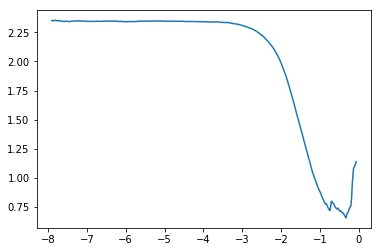

In [56]:
plt.plot(logs[10:-5],losses[10:-5])

In [59]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-1)
train(1)

Epoch 1:
Loss: 0.2645057946125666  Accuracy: 92.19666666666667


1.5